In [2]:
import itertools
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import math
from sklearn import metrics
from random import randint
from matplotlib import style
import seaborn as sns

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
from env import get_connection

In [5]:
url = get_connection("grocery_db")

sql = """
select *
from grocery_customers
"""

df = pd.read_sql(sql, url, index_col="customer_id")
df.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
customer_id,,,,,,,,
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [6]:
# Cluster on all or a selected subset of features
dbdf = df[["Detergents_Paper", "Delicassen", "Frozen"]]
dbdf.head(2)

,Detergents_Paper,Delicassen,Frozen
customer_id,,,
0,2674,1338,214
1,3293,1776,1762


In [7]:
# Make the scaler
scaler = MinMaxScaler()

# Fit the scaler
scaler.fit(dbdf)

# Use the scaler
dbdf = scaler.transform(dbdf)
dbdf

array([[0.0654272 , 0.02784731, 0.0031063 ],
       [0.08058985, 0.03698373, 0.02854842],
       [0.08605232, 0.16355861, 0.03911643],
       ...,
       [0.36346267, 0.03888194, 0.00677142],
       [0.00404174, 0.04426366, 0.01664914],
       [0.01161082, 0.00102211, 0.00065742]])

In [8]:
# Make the object
dbsc = DBSCAN(eps = .10, min_samples = 20)

# Fit the object
dbsc.fit(dbdf)

DBSCAN(eps=0.1, min_samples=20)

In [9]:
# Now, let's add the scaled value columns back onto the dataframe
columns = ["Detergents_Paper", "Delicassen", "Frozen"]
scaled_columns = ["Scaled_" + column for column in columns]

# Save a copy of the original dataframe
original_df = df.copy()

# Create a dataframe containing the scaled values
scaled_df = pd.DataFrame(dbdf, columns=scaled_columns)

# Merge the scaled and non-scaled values into one dataframe
df = df.merge(scaled_df, on=df.index)
df = df.drop(columns=['key_0'])
df.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Scaled_Detergents_Paper,Scaled_Delicassen,Scaled_Frozen
0,2,3,12669,9656,7561,214,2674,1338,0.065427,0.027847,0.003106
1,2,3,7057,9810,9568,1762,3293,1776,0.080590,0.036984,0.028548
2,2,3,6353,8808,7684,2405,3516,7844,0.086052,0.163559,0.039116
3,1,3,13265,1196,4221,6404,507,1788,0.012346,0.037234,0.104842
4,2,3,22615,5410,7198,3915,1777,5185,0.043455,0.108093,0.063934


In [10]:
# Assign the cluster labels
# DBSCAN makes a cluster called -1 that contains the "noise" or outliers
df['labels'] = dbsc.labels_
df.labels.value_counts()

 0    423
-1     17
Name: labels, dtype: int64

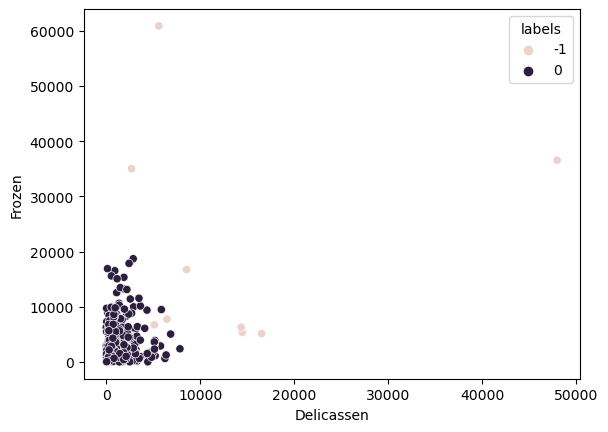

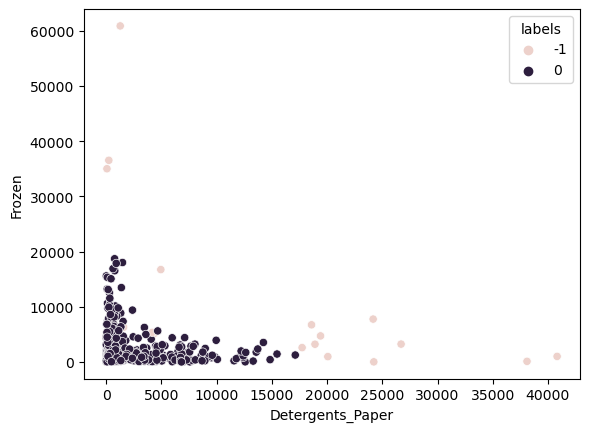

In [11]:
sns.scatterplot(x=df.Delicassen, y=df.Frozen, hue=df.labels)
plt.show()

sns.scatterplot(x=df.Detergents_Paper, y=df.Frozen, hue=df.labels)
plt.show()

Text(0.5, 0, 'Detergents_Paper')

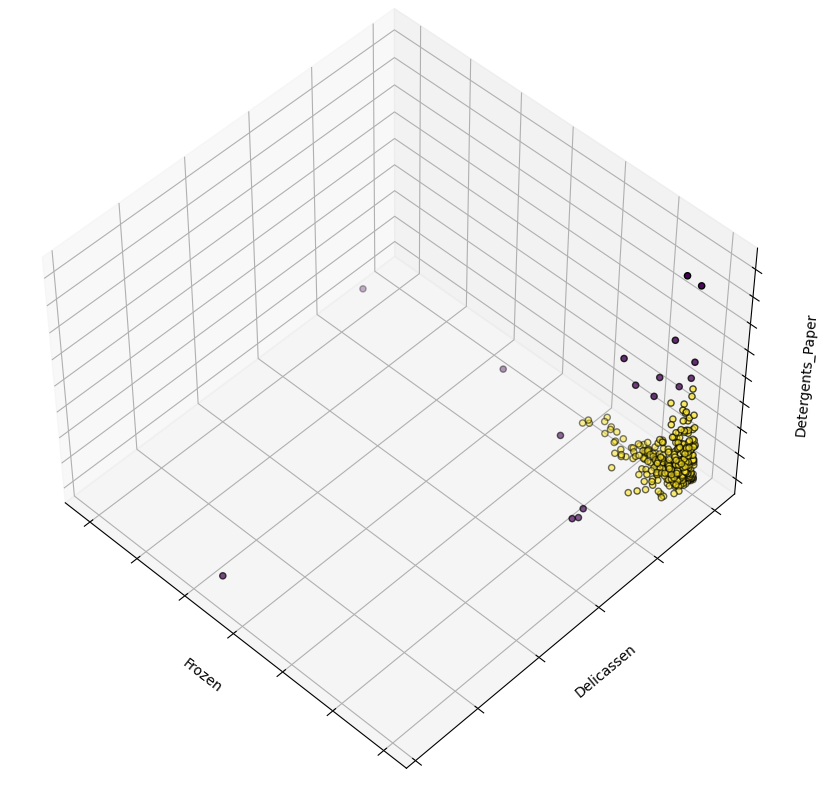

In [12]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(8, 8))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

# plot the points
ax.scatter(df.Frozen, df.Delicassen, df.Detergents_Paper,
           c=df.labels, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

ax.set_xlabel('Frozen')
ax.set_ylabel('Delicassen')
ax.set_zlabel('Detergents_Paper')


## logs

In [21]:
df=pd.read_csv('curriculum_logs.csv')
df.head()

,Unnamed: 0,date,time,path,user_id,cohort_id,ip
0,0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61
1,1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61
2,2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
3,3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
4,4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61


In [22]:
#setting the date column to a datetime and then assigning it to the index
df.date = pd.to_datetime(df.date)
df = df.set_index(df.date)
#resampling the path column by day and assigning it to a variable
pages = df['path'].resample('d').count()
pages.head()

date
2018-01-26    572
2018-01-27    230
2018-01-28    170
2018-01-29    830
2018-01-30    652
Freq: D, Name: path, dtype: int64

In [23]:
df=df.drop(columns=['Unnamed: 0','date'])

In [24]:
df.head()

,time,path,user_id,cohort_id,ip
date,,,,,
2018-01-26,09:55:03,/,1,8.0,97.105.19.61
2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61
2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61


In [53]:
dbdf = df[["user_id", "ip"]]
dbdf.head(2)

,user_id,ip
date,,
2018-01-26,1,97.105.19.61
2018-01-26,1,97.105.19.61


In [54]:
dbdf.isna().sum()

user_id    0
ip         0
dtype: int64